# Part I - (USA Trips)
## by (Adébayo Gael )

## Introduction

> In this project I'm going to analyze a data set with information about flights in the United States.

## Preliminary Wrangling


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import requests as re
import os
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data = pd.read_csv('data/2007.csv')
df = data.copy()

In [3]:
df.sample(5)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
2288123,2007,4,9,1,1826.0,1831,1925.0,1934,9E,2844,...,5,10,0,NaN,0,0,0,0,0,0
368072,2007,1,14,7,612.0,620,757.0,816,FL,989,...,9,16,0,NaN,0,0,0,0,0,0
5999199,2007,10,19,5,1045.0,1045,1147.0,1148,MQ,3045,...,7,19,0,NaN,0,0,0,0,0,0
578813,2007,1,19,5,1223.0,1225,1618.0,1617,CO,554,...,12,26,0,NaN,0,0,0,0,0,0
2459447,2007,5,7,1,1204.0,1210,1457.0,1450,WN,949,...,3,7,0,NaN,0,0,0,0,0,0


In [4]:
df.shape

(7453215, 29)

In [5]:
df.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7453215 entries, 0 to 7453214
Data columns (total 29 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Year               int64  
 1   Month              int64  
 2   DayofMonth         int64  
 3   DayOfWeek          int64  
 4   DepTime            float64
 5   CRSDepTime         int64  
 6   ArrTime            float64
 7   CRSArrTime         int64  
 8   UniqueCarrier      object 
 9   FlightNum          int64  
 10  TailNum            object 
 11  ActualElapsedTime  float64
 12  CRSElapsedTime     float64
 13  AirTime            float64
 14  ArrDelay           float64
 15  DepDelay           float64
 16  Origin             object 
 17  Dest               object 
 18  Distance           int64  
 19  TaxiIn             int64  
 20  TaxiOut            int64  
 21  Cancelled          int64  
 22  CancellationCode   object 
 23  Diverted           int64  
 24  CarrierDelay       int64  
 25  WeatherDelay      

In [7]:
(df.isnull().sum()/len(df)).sort_values(ascending=False)

CancellationCode     0.978432
ArrTime              0.023873
AirTime              0.023873
ActualElapsedTime    0.023873
ArrDelay             0.023873
DepTime              0.021568
DepDelay             0.021568
CRSElapsedTime       0.000133
TailNum              0.000003
WeatherDelay         0.000000
CarrierDelay         0.000000
Diverted             0.000000
Distance             0.000000
NASDelay             0.000000
SecurityDelay        0.000000
Cancelled            0.000000
TaxiOut              0.000000
TaxiIn               0.000000
Year                 0.000000
Dest                 0.000000
Origin               0.000000
Month                0.000000
FlightNum            0.000000
UniqueCarrier        0.000000
CRSArrTime           0.000000
CRSDepTime           0.000000
DayOfWeek            0.000000
DayofMonth           0.000000
LateAircraftDelay    0.000000
dtype: float64

In [8]:
df.describe()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,...,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,7453215.0,7.453215e+06,7.453215e+06,7.453215e+06,7.292467e+06,7.453215e+06,7.275288e+06,7.453215e+06,7.453215e+06,7.275288e+06,...,7.453215e+06,7.453215e+06,7.453215e+06,7.453215e+06,7.453215e+06,7.453215e+06,7.453215e+06,7.453215e+06,7.453215e+06,7.453215e+06
mean,2007.0,6.514876e+00,1.572589e+01,3.933804e+00,1.339221e+03,1.330596e+03,1.482105e+03,1.495392e+03,2.188099e+03,1.263223e+02,...,7.198058e+02,6.691984e+00,1.630015e+01,2.156761e-02,2.304911e-03,3.865236e+00,7.700904e-01,3.783702e+00,2.373553e-02,5.099134e+00
std,0.0,3.425117e+00,8.781154e+00,1.992267e+00,4.798528e+02,4.647080e+02,5.072241e+02,4.815902e+02,1.971958e+03,7.118009e+01,...,5.623051e+02,5.151351e+00,1.183396e+01,1.452668e-01,4.795413e-02,2.084240e+01,9.619547e+00,1.617670e+01,1.084995e+00,2.127753e+01
min,2007.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.200000e+01,...,1.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2007.0,4.000000e+00,8.000000e+00,2.000000e+00,9.300000e+02,9.300000e+02,1.107000e+03,1.115000e+03,5.900000e+02,7.600000e+01,...,3.190000e+02,4.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2007.0,7.000000e+00,1.600000e+01,4.000000e+00,1.329000e+03,1.322000e+03,1.513000e+03,1.520000e+03,1.509000e+03,1.080000e+02,...,5.690000e+02,5.000000e+00,1.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,2007.0,9.000000e+00,2.300000e+01,6.000000e+00,1.733000e+03,1.720000e+03,1.911000e+03,1.906000e+03,3.553000e+03,1.560000e+02,...,9.460000e+02,8.000000e+00,1.900000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,2007.0,1.200000e+01,3.100000e+01,7.000000e+00,2.400000e+03,2.359000e+03,2.400000e+03,2.400000e+03,9.602000e+03,1.270000e+03,...,4.962000e+03,5.450000e+02,5.300000e+02,1.000000e+00,1.000000e+00,2.580000e+03,1.429000e+03,1.386000e+03,3.820000e+02,1.031000e+03


In [9]:
df.describe(include='object')

,UniqueCarrier,TailNum,Origin,Dest,CancellationCode
count,7453215,7453193,7453215,7453215,160749
unique,20,5505,304,310,4
top,WN,0,ATL,ATL,A
freq,1168871,105239,413851,413805,66779


### What is the structure of your dataset?

> The Dataset has 7453215 rows and 29 columns. With a large number of missing values

### What is/are the main feature(s) of interest in your dataset?

> The essential variables are those relating to delays, airport name, air company and distance

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> All the variables are usable. Everyone has information to give

## Univariate Exploration

In [10]:
df.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [11]:
# Year
df.Year.unique()

array([2007], dtype=int64)

> The dataset only contains data from 2007. We can proceed with the analysis then

In [12]:
# Month
df.Month.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

Text(0.5, 1.0, 'Preferred month for travel')

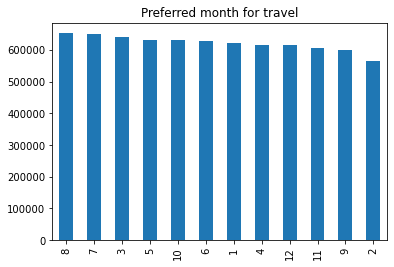

In [13]:
plt.figure()
df.Month.value_counts().head(12).plot(kind='bar')
plt.title('Preferred month for travel')

> We see that people tend to travel between July and August, which is normal because it is the holiday period.

In [14]:
#DayofMonth
df.DayofMonth.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
      dtype=int64)

In [15]:
df_day = df.copy()

In [16]:
print('Number of travel in 1st week: ' , df_day.query('DayofMonth < 9 ').shape[0]);
print('Number of travel in 2nd week: ' , df_day.query('DayofMonth >= 9 & DayofMonth < 17 ').shape[0])
print('Number of travel in 3rd week: ' , df_day.query('DayofMonth >= 17 & DayofMonth < 26 ').shape[0])
print('Number of travel in 4th week: ' , df_day.query('DayofMonth >= 26 ').shape[0])

Number of travel in 1st week:  1951552
Number of travel in 2nd week:  1971506
Number of travel in 3rd week:  2201918
Number of travel in 4th week:  1328239


> We see that there is much less travel at the end of the month from the 26th to the 31st.

In [17]:
#DayofWeek
df.DayOfWeek.unique()

array([1, 2, 3, 4, 5, 6, 7], dtype=int64)

Text(0.5, 1.0, 'Preferred day of week for travel')

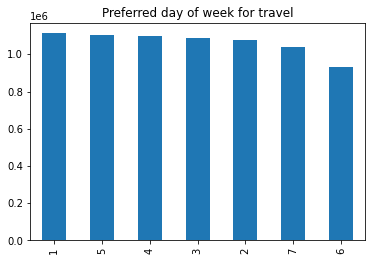

In [18]:
plt.figure()
df.DayOfWeek.value_counts().head(7).plot(kind='bar')
plt.title('Preferred day of week for travel')

> Monday and Friday are the days when we record a lot more travel

Text(0.5, 0, 'DepTime')

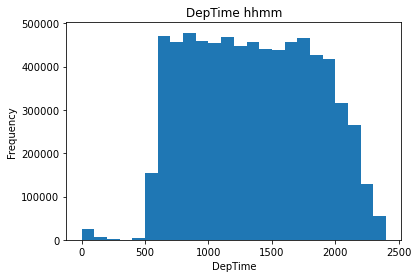

In [19]:
#Deptime
df.DepTime.plot(kind='hist', bins = 24)
plt.title('DepTime hhmm')
plt.xlabel('DepTime')

In [20]:
df.query('DepTime >2400')['DepTime']

Series([], Name: DepTime, dtype: float64)

> Effective departures from the airport are generally between 6 a.m. and 8 p.m.

Text(0.5, 0, 'CRSDepTime')

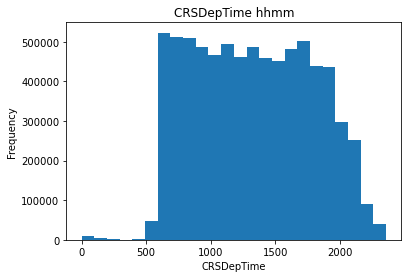

In [21]:
#CRSDepTime
df.CRSDepTime.plot(kind='hist', bins=24)
plt.title('CRSDepTime hhmm')
plt.xlabel('CRSDepTime')

In [22]:
df.query('CRSDepTime >2400')['CRSDepTime']

Series([], Name: CRSDepTime, dtype: int64)

> Flights are mostly scheduled between 6 a.m. and 7 p.m.

Text(0.5, 0, 'ArrTime')

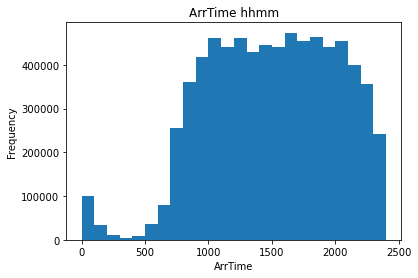

In [23]:
#ArrTime
df.ArrTime.plot(kind='hist', bins=24)
plt.title('ArrTime hhmm')
plt.xlabel('ArrTime')

In [24]:
df.query('ArrTime >2400')['ArrTime']

Series([], Name: ArrTime, dtype: float64)

> Planes land at their destination between 10 a.m. and 9 p.m.

Text(0.5, 0, 'CRSArrTime')

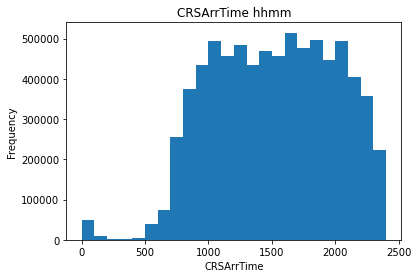

In [25]:
#CRSArrTime
df.CRSArrTime.plot(kind='hist', bins=24)
plt.title('CRSArrTime hhmm')
plt.xlabel('CRSArrTime')

In [26]:
df.query('CRSArrTime >2400')['CRSArrTime']

Series([], Name: CRSArrTime, dtype: int64)

> Most landings are scheduled between 11 a.m. and 9 p.m.

Text(0.5, 1.0, 'Most Scheduled Company')

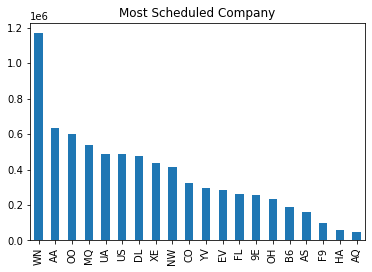

In [27]:
#UniqueCarrier
plt.figure()
df.UniqueCarrier.value_counts().plot(kind='bar')
plt.title('Most Scheduled Company')

> WN, AA, OO, MQ, UA are the airlines that made the most trips

In [28]:
#FlightNum
df.FlightNum.nunique()

7596

In [29]:
#TailNum
df.TailNum.nunique()

5505

Text(0.5, 0, 'ActualElapsedTime')

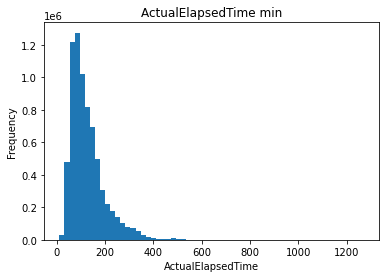

In [30]:
#ActualElapsedTime
df.ActualElapsedTime.plot(kind='hist', bins=60)
plt.title('ActualElapsedTime min')
plt.xlabel('ActualElapsedTime')

In [31]:
df_time = df.query('ActualElapsedTime>420')[['Origin','Dest','ActualElapsedTime']].sort_values(by ='ActualElapsedTime',ascending=False)
df_time

,Origin,Dest,ActualElapsedTime
172666,CVG,LAN,1270.0
3867296,CVG,JAN,1260.0
2205995,HNL,SEA,1095.0
6608082,SFO,HNL,1090.0
2828314,LAX,HNL,989.0
...,...,...,...
7112586,BOS,PHX,421.0
1510130,JFK,SEA,421.0
7090808,DEN,KOA,421.0
7090807,DEN,KOA,421.0


In [32]:
df_time.quantile(q=0.95)

ActualElapsedTime    559.0
Name: 0.95, dtype: float64

In [33]:
df_time = df.query('ActualElapsedTime>638')[['Origin','Dest','ActualElapsedTime']].sort_values(by ='ActualElapsedTime',ascending=False)
df_time

,Origin,Dest,ActualElapsedTime
172666,CVG,LAN,1270.0
3867296,CVG,JAN,1260.0
2205995,HNL,SEA,1095.0
6608082,SFO,HNL,1090.0
2828314,LAX,HNL,989.0
...,...,...,...
4596408,IAD,SMF,639.0
6795233,EWR,HNL,639.0
1169119,ATL,HNL,639.0
3024201,EWR,HNL,639.0


<AxesSubplot:>

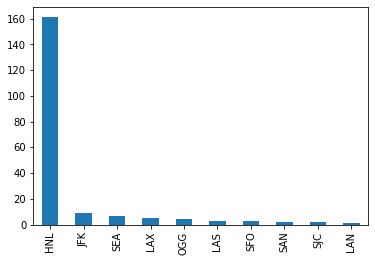

In [34]:
df_time.Dest.value_counts().head(10).plot(kind='bar')

In [35]:
df_time.query('Dest == "HNL"').sort_values(by ='ActualElapsedTime',ascending=False)

,Origin,Dest,ActualElapsedTime
6608082,SFO,HNL,1090.0
2828314,LAX,HNL,989.0
7434434,EWR,HNL,836.0
1162131,EWR,HNL,725.0
7432009,EWR,HNL,711.0
...,...,...,...
2396229,EWR,HNL,639.0
6795233,EWR,HNL,639.0
1169119,ATL,HNL,639.0
3024201,EWR,HNL,639.0


> Trips generally last less than 420 minutes. It would seem that the farthest place to reach in general is HNL airport. 95% of the time, when the destination is this one, the trip is harder than the others

Text(0.5, 0, 'CRSElapsedTime')

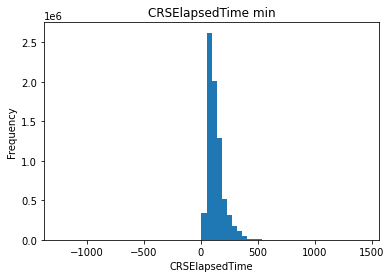

In [36]:
#CRSElapsedTime
df.CRSElapsedTime.plot(kind='hist', bins=60)
plt.title('CRSElapsedTime min')
plt.xlabel('CRSElapsedTime')

In [37]:
df_time.groupby(['Dest'])

In [38]:
df.query('CRSElapsedTime<0')['CRSElapsedTime'].sort_values(ascending=False)

1538199     -46.0
566619    -1240.0
Name: CRSElapsedTime, dtype: float64

In [39]:
df.drop(df.query('CRSElapsedTime<0').index , inplace=True)

Text(0.5, 0, 'CRSElapsedTime')

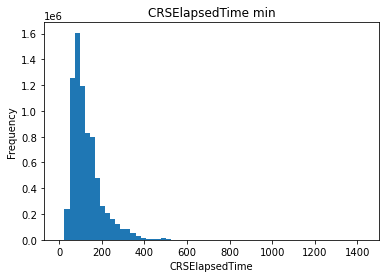

In [40]:
df.CRSElapsedTime.plot(kind='hist', bins=60)
plt.title('CRSElapsedTime min')
plt.xlabel('CRSElapsedTime')

In [41]:
df.query('CRSElapsedTime>420')['CRSElapsedTime'].sort_values(ascending=False)

6026104    1430.0
7252332    1430.0
1781003     660.0
6809486     660.0
6812831     660.0
            ...  
4683231     421.0
4691074     421.0
4695105     421.0
4687222     421.0
4692380     421.0
Name: CRSElapsedTime, Length: 30669, dtype: float64

> Estimates on the duration of a flight in the air seem good. The predicted time histogram closely approximates the actual histogram.

Text(0.5, 0, 'ArrDelay')

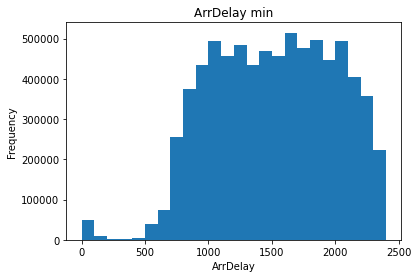

In [42]:
#ArrDelay
df.CRSArrTime.plot(kind='hist', bins=24)
plt.title('ArrDelay min')
plt.xlabel('ArrDelay')

In [43]:
df.query('ArrDelay >2400')['ArrDelay']

6061662    2598.0
Name: ArrDelay, dtype: float64

Text(0.5, 0, 'DepDelay')

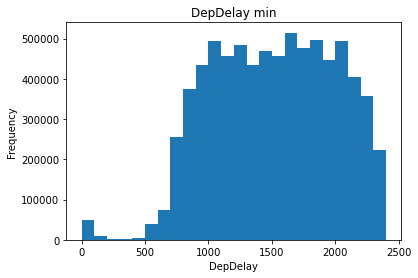

In [44]:
#DepDelay
df.CRSArrTime.plot(kind='hist', bins=24)
plt.title('DepDelay min')
plt.xlabel('DepDelay')

In [45]:
df.query('DepDelay >2400')['DepDelay']

6061662    2601.0
Name: DepDelay, dtype: float64

In [46]:
len(df.query('DepDelay<0')['DepDelay'])*100/len(df)

47.246925587662666

> Delayed flights often land 1000 minutes (4:00 p.m.) later. It has even happened that a scheduled flight has reached 2500 minutes (41h) later. However, note that 47% of flights land before the scheduled time

Text(0.5, 1.0, 'Airport Depart')

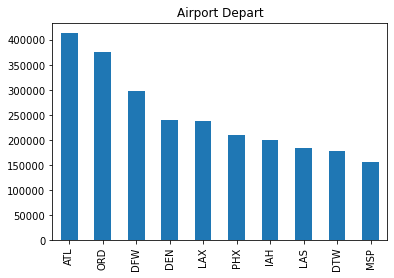

In [47]:
#Origin
plt.figure()
df.Origin.value_counts().head(10).plot(kind='bar')
plt.title('Airport Depart')

Text(0.5, 1.0, 'Airport Arrival')

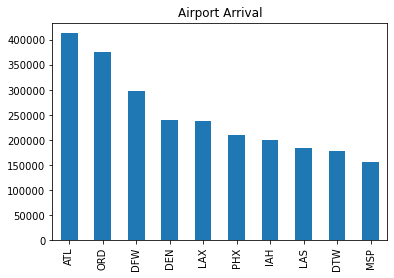

In [48]:
#Dest
plt.figure()
df.Dest.value_counts().head(10).plot(kind='bar')
plt.title('Airport Arrival')

> The airports recording the most travel are in order, ATL, ORD, DFW, DEN, LAX, PHX, IAH, LAS, DTW, MSP

Text(0.5, 0, 'Distance')

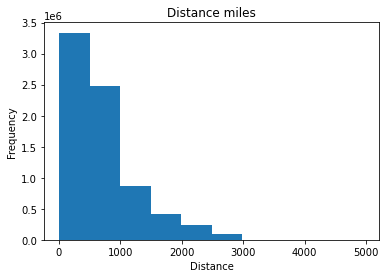

In [49]:
#Distance
df.Distance.plot(kind='hist')
plt.title('Distance miles')
plt.xlabel('Distance')

In [50]:
df_dist = df.query('Distance>3000')[['Origin','Dest','Distance']].sort_values(by ='Distance',ascending=False)
df_dist

,Origin,Dest,Distance
1166010,HNL,EWR,4962
1154566,EWR,HNL,4962
1152195,EWR,HNL,4962
1152030,EWR,HNL,4962
1151770,EWR,HNL,4962
...,...,...,...
2938724,DFW,ANC,3043
2938725,DFW,ANC,3043
2938726,DFW,ANC,3043
2938727,DFW,ANC,3043


In [51]:
df_dist.quantile(q=0.85)

Distance    4502.0
Name: 0.85, dtype: float64

In [52]:
df_dist = df.query('Distance>4502')[['Origin','Dest','Distance']].sort_values(by ='Distance',ascending=False)
df_dist

,Origin,Dest,Distance
574557,EWR,HNL,4962
4979003,EWR,HNL,4962
4979281,HNL,EWR,4962
4979705,HNL,EWR,4962
4979775,HNL,EWR,4962
...,...,...,...
3025408,HNL,EWR,4962
3026180,EWR,HNL,4962
3026456,EWR,HNL,4962
3026946,EWR,HNL,4962


In [53]:
df_dist.query('Dest == "HNL"').sort_values(by ='Distance',ascending=False)

,Origin,Dest,Distance
574557,EWR,HNL,4962
582703,EWR,HNL,4962
578673,EWR,HNL,4962
578590,EWR,HNL,4962
578026,EWR,HNL,4962
...,...,...,...
7433923,EWR,HNL,4962
7433807,EWR,HNL,4962
7433342,EWR,HNL,4962
7433278,EWR,HNL,4962


> Trips are generally a maximum of 3000 miles. It would seem that the farthest place to reach in general is HNL airport. 85% of the time, when the destination is this one, the trip is longer than the others

Text(0.5, 0, 'TaxiIn')

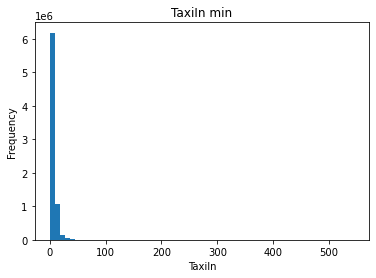

In [54]:
#TaxiIn
df.TaxiIn.plot(kind='hist', bins=60)
plt.title('TaxiIn min')
plt.xlabel('TaxiIn')

In [55]:
df.query('TaxiIn>40')['TaxiIn'].sort_values(ascending=False)

1137098    545
1136659    486
1136778    459
775498     353
1136654    353
          ... 
2905448     41
5361918     41
5363269     41
2866917     41
4302812     41
Name: TaxiIn, Length: 17202, dtype: int64

Text(0.5, 0, 'TaxiOut')

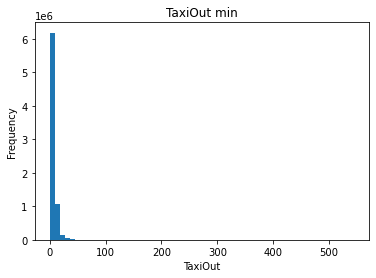

In [56]:
#TaxiOut
df.TaxiIn.plot(kind='hist', bins=60)
plt.title('TaxiOut min')
plt.xlabel('TaxiOut')

In [57]:
df.query('TaxiOut>40')['TaxiOut'].sort_values(ascending=False)

7025465    530
1136857    435
1185812    403
7025468    400
2553986    392
          ... 
6546684     41
5320451     41
7155573     41
6546810     41
5981679     41
Name: TaxiOut, Length: 251130, dtype: int64

Text(0.5, 1.0, 'Cancelled travel %')

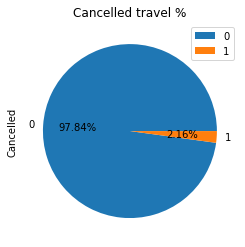

In [58]:
#Cancelled
df.Cancelled.value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.legend()
plt.title('Cancelled travel %')

Text(0.5, 1.0, 'Cancelled motif')

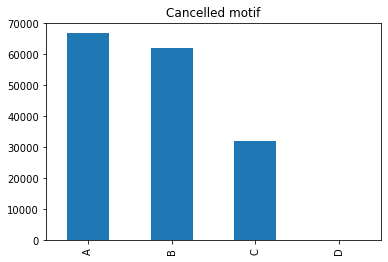

In [59]:
#CancellationCode
df.CancellationCode.value_counts().plot(kind='bar')
plt.title('Cancelled motif')

> Only 2% of flights are cancelled. The two main reasons are: carrier and weather

Text(0.5, 1.0, 'Diverted travel %')

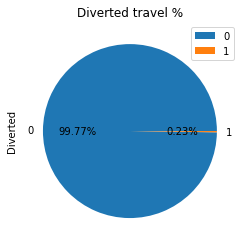

In [60]:
#Diverted
df.Diverted.value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.legend()
plt.title('Diverted travel %')

> A tiny part of the flights was hijacked, 0.23%

Text(0.5, 0, 'CarrierDelay')

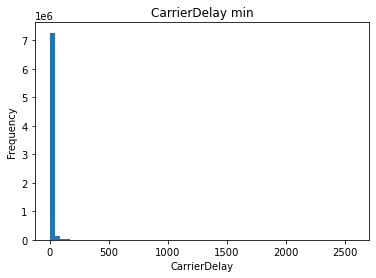

In [61]:
#CarrierDelay
df.CarrierDelay.plot(kind='hist', bins=60)
plt.title('CarrierDelay min')
plt.xlabel('CarrierDelay')

In [62]:
df.query('CarrierDelay>120')['CarrierDelay'].sort_values(ascending=False)

6061662    2580
7299451    1942
6060526    1831
6082457    1715
5439037    1665
           ... 
1780801     121
7077974     121
1489458     121
4041225     121
5933593     121
Name: CarrierDelay, Length: 39564, dtype: int64

Text(0.5, 0, 'NASDelay')

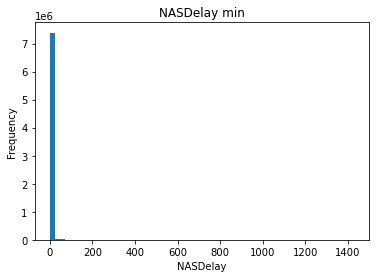

In [63]:
#NASDelay
df.WeatherDelay.plot(kind='hist', bins=60)
plt.title('NASDelay min')
plt.xlabel('NASDelay')

In [64]:
df.query('NASDelay>120')['NASDelay'].sort_values(ascending=False)

4230378    1386
2857190    1352
1643023    1324
7242415    1321
4157828    1270
           ... 
6026605     121
3381791     121
6039144     121
6040612     121
7060803     121
Name: NASDelay, Length: 29961, dtype: int64

Text(0.5, 0, 'SecurityDelay')

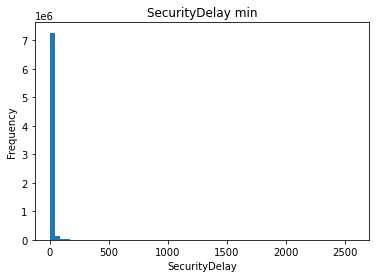

In [65]:
#SecurityDelay
df.CarrierDelay.plot(kind='hist', bins=60)
plt.title('SecurityDelay min')
plt.xlabel('SecurityDelay')

In [66]:
df.query('SecurityDelay>120')['SecurityDelay'].sort_values(ascending=False)

1701614    382
5019603    366
739315     357
6985047    299
6336981    297
          ... 
418388     126
5624121    124
2780709    123
789322     121
4511620    121
Name: SecurityDelay, Length: 113, dtype: int64

Text(0.5, 0, 'LateAircraftDelay')

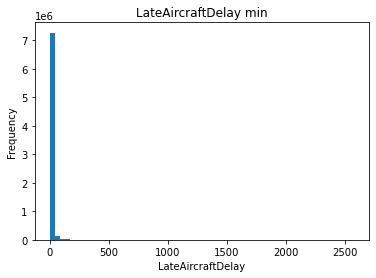

In [67]:
#LateAircraftDelay
df.CarrierDelay.plot(kind='hist', bins=60)
plt.title('LateAircraftDelay min')
plt.xlabel('LateAircraftDelay')

In [68]:
df.query('LateAircraftDelay>120')['LateAircraftDelay'].sort_values(ascending=False)

6669348    1031
3304430    1014
1019198    1011
1486680    1003
2357337     996
           ... 
824053      121
3799974     121
3005914     121
4272151     121
4855003     121
Name: LateAircraftDelay, Length: 58705, dtype: int64

> Regardless of the reasons for a flight delay, the flight generally takes off within 2 hours. But in case of carrier it can take much longer than usual

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> For the CRSElapsedTime variable, an inappropriate value had to be deleted. As for the others, the valuers can be considered good.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> In the distance, we noticed that the values related to flights on Hawaii are very far from the others, which is quite normal. So we didn't touch that.

## Bivariate Exploration

Text(0.5, 1.0, 'Correlation between Distance and Travel time')

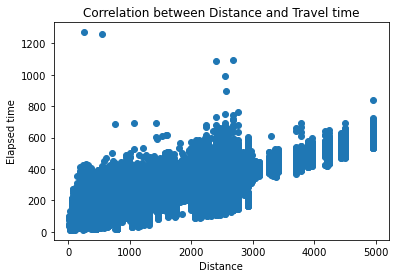

In [69]:
#Distance and ActualElapsedTime
plt.scatter(data=df,x='Distance',y='ActualElapsedTime')
plt.ylabel('Elapsed time')
plt.xlabel('Distance')
plt.title('Correlation between Distance and Travel time')

In [70]:
df.drop(df.query('ActualElapsedTime>800').index , inplace=True)

> It can be seen that there is a correlation between the two variables. Indeed, the greater the distance, the longer the trip takes. However, outliers are observed. We decided to delete them for a better analysis

Text(0.5, 1.0, 'Correlation between Dep and Arrival delay')

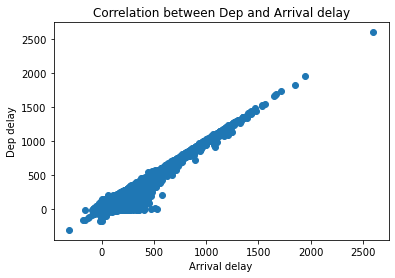

In [71]:
# ArrDelay and DepDelay
plt.scatter(data=df,x='ArrDelay',y='DepDelay')
plt.xlabel('Arrival delay')
plt.ylabel('Dep delay')
plt.title('Correlation between Dep and Arrival delay')

> It can be seen that there is a correlation between the two variables. Indeed, the more the departure time is delayed, the more the arrival time is too. Which is completely normal.

Text(0.5, 1.0, 'Carrier with most Dep Delay')

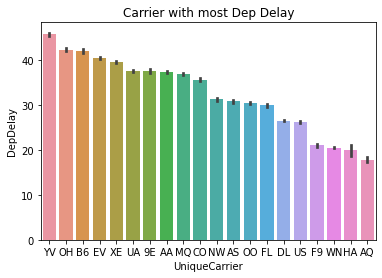

In [72]:
# UniqueCarrier and DepDelay
df_late=df[df.DepDelay > 0]
order2 = df_late.groupby(['UniqueCarrier']).DepDelay.mean().sort_values(ascending=False).index
sns.barplot(data=df_late, x='UniqueCarrier',y='DepDelay',order=order2)
plt.title('Carrier with most Dep Delay')

> In the event of inconvenience causing a delay, companies YV, CH and B6 take a long time before taking off. AQ is the most responsive.

Text(0.5, 1.0, 'Airport with most Dep Delay')

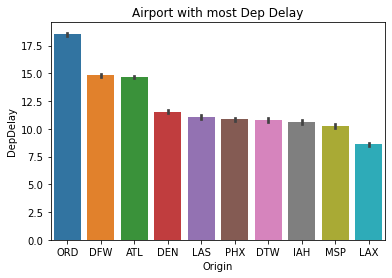

In [73]:
# Origin and DepDelay
plt.figure()
airport = df.Origin.value_counts().head(10).index.tolist()
df_airport = df[df.Origin.isin(airport)]
order3 = df_airport.groupby(['Origin']).DepDelay.mean().sort_values(ascending=False).index
sns.barplot(data=df_airport, x='Origin',y='DepDelay',order=order3)
plt.title('Airport with most Dep Delay')

> The airport where the most delays are recorded is ORD airport. It is followed successively by DFW, ATL, DEN and LAS.

Text(0.5, 1.0, 'Airport with most booking carrier')

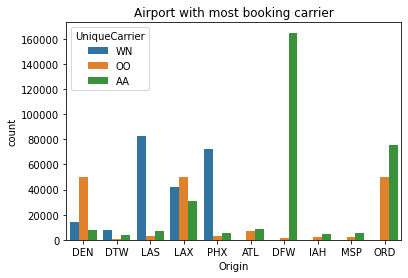

In [74]:
#Origin and UniqueCarrier
plt.figure()
airport = df.Origin.value_counts().head(10).index.tolist()
aircomp= df.UniqueCarrier.value_counts().head(3).index.tolist()
df_airport = df[df.Origin.isin(airport)]
df_airport_aircomp = df_airport[df_airport.UniqueCarrier.isin(aircomp)]
sns.countplot(data=df_airport_aircomp, x='Origin',hue='UniqueCarrier')
plt.title('Airport with most booking carrier')

> We note that companies are privileged in certain airports. At DFW, AA manages a large majority of trips

In [75]:
cancelled = df.query('Cancelled == 1')

Text(0.5, 1.0, 'The routes that cause the most cancellations')

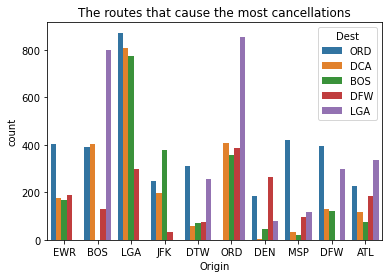

In [76]:
#Origin and Dest
plt.figure()
can_ori = cancelled.Origin.value_counts().head(10).index.tolist()
cancelled_airport = cancelled[cancelled.Origin.isin(can_ori)]
can_dest = cancelled_airport.Dest.value_counts().head(5).index.tolist()
can_routes = cancelled_airport[cancelled_airport.Dest.isin(can_dest)]
sns.countplot(data=can_routes, x='Origin',hue='Dest')
plt.title('The routes that cause the most cancellations')

> This graph allows us to have an overview of the routes with the most canceled flights

Text(0.5, 1.0, 'Cancelattion reasons per airport')

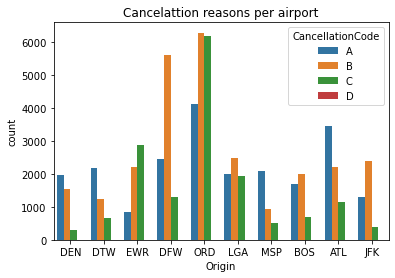

In [77]:
#Origin and CancellationCode
sns.countplot(data=cancelled_airport, x='Origin',hue='CancellationCode')
plt.title('Cancelattion reasons per airport')

> This graph allows us to have an overview of the reasons for cancellation of trips in each city

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> During the investigation, it was noticed that there is a correlation between the distance and the duration of the flights. In addition, we note that on the whole each company has operated in its own way. each presents unique and unique data

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> The other variables have no common characteristics

## Multivariate Exploration

In [78]:
df2= df.query('Diverted==1')

In [79]:
df2.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [80]:
df2 = df2[['Month', 'DayofMonth', 'DayOfWeek', 'UniqueCarrier', 'CRSDepTime', 'DepTime','Origin','Dest', 'Distance']]
df2.sample(3)

,Month,DayofMonth,DayOfWeek,UniqueCarrier,CRSDepTime,DepTime,Origin,Dest,Distance
165355,1,16,2,OH,1150,1310.0,SRQ,CVG,812
4362379,8,5,7,WN,1255,1248.0,SAN,MDW,1728
5975760,10,7,7,FL,1221,1221.0,ATL,BUF,712


Text(0.5, 1.0, 'Current boarding time')

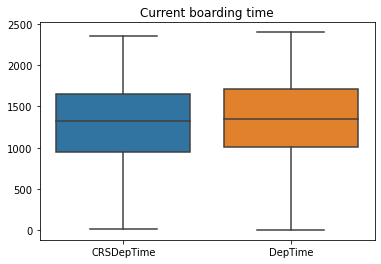

In [81]:
vars = ["CRSDepTime","DepTime"]
sns.boxplot(data = df2[vars].sample(10000))
plt.title('Current boarding time')

In [82]:
df2.describe(include='all')

,Month,DayofMonth,DayOfWeek,UniqueCarrier,CRSDepTime,DepTime,Origin,Dest,Distance
count,17179.00000,17179.000000,17179.000000,17179,17179.000000,17179.000000,17179,17179,17179.000000
unique,NaN,NaN,NaN,20,NaN,NaN,272,271,NaN
top,NaN,NaN,NaN,AA,NaN,NaN,ATL,DFW,NaN
freq,NaN,NaN,NaN,2097,NaN,NaN,920,1948,NaN
mean,6.46778,16.239304,3.889574,NaN,1319.734327,1347.600035,NaN,NaN,936.076139
std,3.19982,8.742754,1.942525,NaN,438.986813,466.295527,NaN,NaN,631.116412
min,1.00000,1.000000,1.000000,NaN,10.000000,3.000000,NaN,NaN,30.000000
25%,4.00000,9.000000,2.000000,NaN,950.000000,1004.000000,NaN,NaN,483.000000
50%,7.00000,16.000000,4.000000,NaN,1325.000000,1348.000000,NaN,NaN,802.000000
75%,9.00000,24.000000,5.000000,NaN,1650.000000,1715.000000,NaN,NaN,1188.500000


> By studying the cases of hijacked planes, we notice that almost no company or city is spared. The kidnappers are probably acting randomly. However, we can say that daytime flights are a relevant selection criterion for them to operate.

## Conclusions
> During this analysis, I came across a lot of information that I personally did not know. here is the strength of data analysis, bringing a surplus of information to decision-makers. however I am a little surprised that the air sector is so diversified from one city to another but also of the many cases of flight delays. For a country like the United States it can be surprising
